NYU v2
======

https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html


Use of NYUv2 in literature
==========================
"In this section, we evaluate our MonoIndoor on the
NYUv2 depth dataset [33] which contains 464 indoor video
sequences captured by a hand-held Microsoft Kinect RGB-
D camera with a resolution of 640×480. We use the official
training and validation splits which include 302 and 33 se-
quences respectively. We rectify the images with provided
camera parameters to remove distortions. Following [44, 2],
the raw dataset is firstly downsampled 10 times along the
temporal dimension to remove redundant frames, resulting
in ∼ 20K images for training. During training, images are
resized to 320×256. We use officially provided 654 images
with dense labelled depth maps for testing." - [*Ji et al. 2021 MonoIndoor: Towards Good Practice of Self-Supervised
Monocular Depth Estimation for Indoor Environments*](https://openaccess.thecvf.com/content/ICCV2021/papers/Ji_MonoIndoor_Towards_Good_Practice_of_Self-Supervised_Monocular_Depth_Estimation_for_ICCV_2021_paper.pdf)

"NYU Depth V2. NYU Depth V2 consists of a total 582 indoor scenes. We
adopt the same train split of 283 scenes following previous work on indoor depth
estimation [53] and provide our results on the official test set with the standard
depth evaluation criteria. We sample the training set at 10 frames interval as
our target views and use ±10, ±20 frames as our source views. This leaves us
around 20K unique images, a number much less than the 180K images used in
the previous work of unsupervised indoor depth estimation [53]. We undistort
the input image as in [42] and crop 16 black pixels from the border region.
We compare with MovingIndoor [53], the pioneer work on unsupervised in-
door depth estimation and Monov2 [17], a state-of-the-art unsupervised depth
estimation method on outdoor datasets." - [*Yu et al. 2020 P2Net: Patch-match and Plane-regularization
for Unsupervised Indoor Depth Estimation*](https://www.ecva.net/papers/eccv_2020/papers_ECCV/papers/123690205.pdf)

"NYUv2 [36]. The dataset is composed of indoor video sequences
recorded by a handheld Kinect RGB-D camera at 640 × 480
resolution. The dataset contains 464 scenes taken from three cities.
We use the officially provided 654 densely labeled images for
testing, and use the rest 335 sequences (no overlap with testing
scenes) for training (302) and validation (33). The raw training
sequences contain 268K images. It is first downsampled 10 times
to remove redundant frames. We train on the pre-processed data
(i.e., it generates 67K rectified pairs) and train directly on original
data with ARN, respectively. The images are resized to 320×256
resolution for training." - [*Bian et al. 2022 Auto-Rectify Network for Unsupervised Indoor
Depth Estimation*](https://jwbian.net/Papers/ARN_Depth_TPAMI_22.pdf)

---------

What is this official train/test split?
- https://github.com/ayanc/mdepth/issues/5
- https://github.com/janivanecky/Depth-Estimation/tree/master/dataset ?

The labeled dataset contains 1449 images...


Downloads
=========

Labeled dataset: http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat
    - MAT file. Variables: see web page for description.
        - images: HxWx3xN matrix
        - scenes: Nx1 array, name of scene in which image N is taken
        - sceneTypes: Nx1 type of scene
        - rawDepths: HxWxN. Depths in m reprojected onto RGB image
            - depths: HxWxN. Inpainted depths

Raw dataset: https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html#raw_parts
    - Extremely large
    - Not post-processed (e.g. RGB and Depth synchronization)

Toolbox: http://cs.nyu.edu/~silberman/code/toolbox_nyu_depth_v2.zip
    - `camera_params.m`: Kinect camera parameters
    - `get_synched_frames.m`: only for raw dataset, I hope?


Download and installation
=========================

Setup script provided, run:

In [1]:
%%bash
make all

make: Nothing to be done for 'all'.


Obtaining images
================

Dataset images can be obtained by loading the .mat file in Python. Note that the .mat file uses a format that cannot be loaded using scipy's `loadmat`!. Instead, use the `mat73` library to load the .mat file.

Note: loading the entire .mat file can take quite some time...

In [2]:
import mat73

nyu = mat73.loadmat('data/nyu_depth_v2_labeled.mat')  # Note: may throw an error `ERROR:root:ERROR: MATLAB type not supported: containers.Map, (uint32)`

ERROR:root:ERROR: MATLAB type not supported: containers.Map, (uint32)


Images can be read from the 'images' matrix:

(480, 640, 3, 1449)


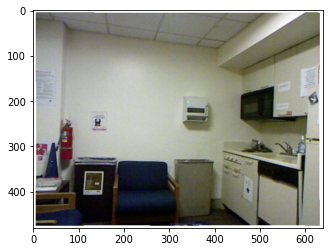

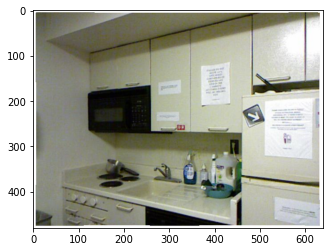

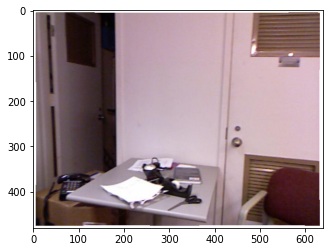

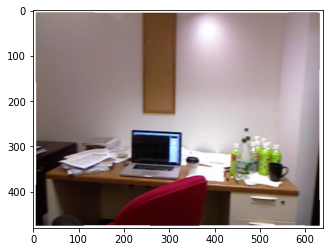

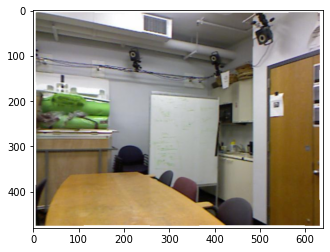

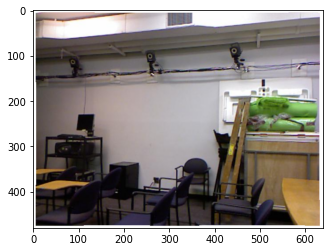

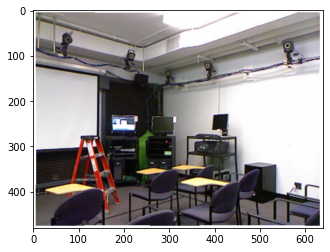

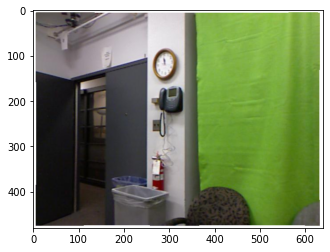

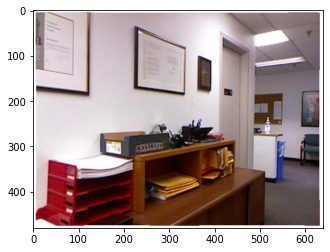

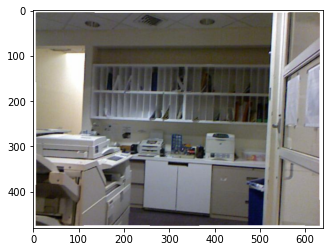

In [3]:
import matplotlib.pyplot as plt

imgs = nyu['images']

print(imgs.shape)

for i in range(10):
    plt.figure()
    plt.imshow(imgs[:,:,:,i])
plt.show()

**ERROR: the images do not form a sequence...**

In [4]:
print(nyu['images'].shape)
print(nyu['rawDepths'].shape)

(480, 640, 3, 1449)
(480, 640, 1449)
